In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as AerSampler   
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.algorithms import QSVC


In [ ]:
df = pd.read_csv('../stunting_dataset_10k.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Jenis Kelamin      10000 non-null  int64  
 1   Umur (bulan)       10000 non-null  int64  
 2   Tinggi Badan (cm)  10000 non-null  float64
 3   Berat Badan (kg)   10000 non-null  float64
 4   Stunting           10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [13]:
X = df.drop('Stunting', axis=1)
y = df['Stunting']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Initialize SVC with RBF kernel
svc_rbf = SVC(kernel='rbf', C=1.0, probability=True)

# Fit the model
svc_rbf.fit(X_train_scaled, y_train)

# Predict the labels
y_pred_svc_test = svc_rbf.predict(X_test_scaled)
y_pred_svc_train = svc_rbf.predict(X_train_scaled)

# Print classification report
print('train')
print("Classification Report for train Support Vector Classification (SVC) with RBF Kernel:")
print(classification_report(y_train, y_pred_svc_train))
print('test')
print("Classification Report for test Support Vector Classification (SVC) with RBF Kernel:")
print(classification_report(y_test, y_pred_svc_test))


train
Classification Report for train Support Vector Classification (SVC) with RBF Kernel:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      1993
           1       0.80      1.00      0.89      1994
           2       0.89      0.77      0.83      2020
           3       0.89      1.00      0.94      1993

    accuracy                           0.89      8000
   macro avg       0.90      0.89      0.88      8000
weighted avg       0.90      0.89      0.88      8000

test
Classification Report for test Support Vector Classification (SVC) with RBF Kernel:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88       507
           1       0.81      1.00      0.90       506
           2       0.89      0.76      0.82       480
           3       0.89      1.00      0.94       507

    accuracy                           0.89      2000
   macro avg       0.90      0.89      0.88      2000
weigh

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Inisialisasi SVC dengan kernel linear
svc_linear = SVC(kernel='linear', C=1.0, probability=True)

# Fit model
svc_linear.fit(X_train_scaled, y_train)

# Predict the labels
y_pred_svc_test = svc_linear.predict(X_test_scaled)
y_pred_svc_train = svc_linear.predict(X_train_scaled)

# Print classification report
print('train')
print("Classification Report for train Support Vector Classification (SVC) with LINEAR Kernel:")
print(classification_report(y_train, y_pred_svc_train))
print('test')
print("Classification Report for test Support Vector Classification (SVC) with LINEAR Kernel:")
print(classification_report(y_test, y_pred_svc_test))


train
Classification Report for train Support Vector Classification (SVC) with LINEAR Kernel:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      1993
           1       0.71      0.73      0.72      1994
           2       0.68      0.75      0.71      2020
           3       0.83      0.90      0.87      1993

    accuracy                           0.77      8000
   macro avg       0.77      0.77      0.77      8000
weighted avg       0.77      0.77      0.77      8000

test
Classification Report for test Support Vector Classification (SVC) with LINEAR Kernel:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       507
           1       0.71      0.70      0.70       506
           2       0.65      0.75      0.69       480
           3       0.82      0.87      0.85       507

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Inisialisasi SVC dengan kernel polynomial
svc_poly = SVC(kernel='poly', C=1.0, degree=2, probability=True)

# Fit model
svc_poly.fit(X_train_scaled, y_train)

# Predict the labels
y_pred_svc_test = svc_poly.predict(X_test_scaled)
y_pred_svc_train = svc_poly.predict(X_train_scaled)

# Print classification report
print('train')
print("Classification Report for train Support Vector Classification (SVC) with POLY Kernel:")
print(classification_report(y_train, y_pred_svc_train))
print('test')
print("Classification Report for test Support Vector Classification (SVC) with POLY Kernel:")
print(classification_report(y_test, y_pred_svc_test))

train
Classification Report for train Support Vector Classification (SVC) with POLY Kernel:
              precision    recall  f1-score   support

           0       0.39      0.72      0.51      1993
           1       0.55      0.45      0.50      1994
           2       0.56      0.25      0.35      2020
           3       0.79      0.72      0.75      1993

    accuracy                           0.53      8000
   macro avg       0.57      0.53      0.53      8000
weighted avg       0.57      0.53      0.52      8000

test
Classification Report for test Support Vector Classification (SVC) with POLY Kernel:
              precision    recall  f1-score   support

           0       0.39      0.72      0.51       507
           1       0.52      0.40      0.45       506
           2       0.54      0.26      0.35       480
           3       0.78      0.68      0.73       507

    accuracy                           0.52      2000
   macro avg       0.56      0.52      0.51      2000
wei

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Inisialisasi SVC dengan kernel sigmoid
svc_sigmoid = SVC(kernel='sigmoid', C=1.0, probability=True)

# Fit model
svc_sigmoid.fit(X_train_scaled, y_train)

# Predict the labels
y_pred_svc_test = svc_sigmoid.predict(X_test_scaled)
y_pred_svc_train = svc_sigmoid.predict(X_train_scaled)

# Print classification report
print('train')
print("Classification Report for train Support Vector Classification (SVC) with SIGMOID Kernel:")
print(classification_report(y_train, y_pred_svc_train))
print('test')
print("Classification Report for test Support Vector Classification (SVC) with SIGMOID Kernel:")
print(classification_report(y_test, y_pred_svc_test))


train
Classification Report for train Support Vector Classification (SVC) with SIGMOID Kernel:
              precision    recall  f1-score   support

           0       0.30      0.51      0.38      1993
           1       0.65      0.18      0.28      1994
           2       0.32      0.50      0.39      2020
           3       0.78      0.33      0.46      1993

    accuracy                           0.38      8000
   macro avg       0.51      0.38      0.38      8000
weighted avg       0.51      0.38      0.38      8000

test
Classification Report for test Support Vector Classification (SVC) with SIGMOID Kernel:
              precision    recall  f1-score   support

           0       0.31      0.52      0.39       507
           1       0.67      0.19      0.29       506
           2       0.31      0.50      0.38       480
           3       0.78      0.35      0.48       507

    accuracy                           0.39      2000
   macro avg       0.52      0.39      0.39      20

             Feature  Importance Mean  Importance Std
2  Tinggi Badan (cm)         0.636562        0.002760
1       Umur (bulan)         0.515900        0.003605
0      Jenis Kelamin         0.103138        0.002982
3   Berat Badan (kg)         0.018688        0.001007


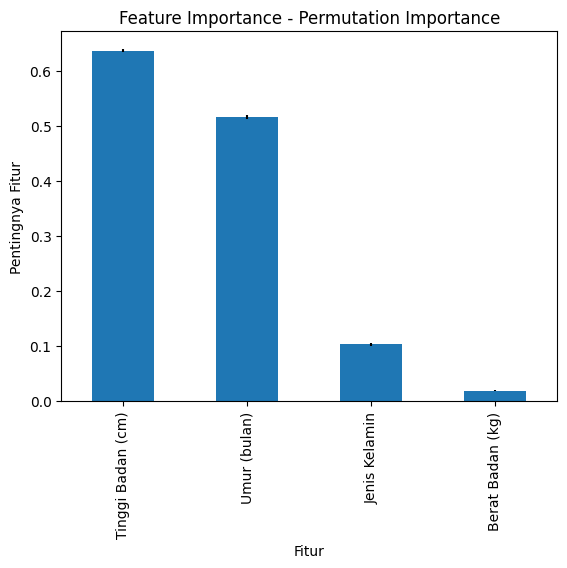

In [20]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Hitung Permutation Importance
result = permutation_importance(svc_rbf, X_train_scaled, y_train, n_repeats=10, random_state=42, n_jobs=-1)

# Buat DataFrame untuk menyimpan hasil
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance Mean', ascending=False)

# Cetak tabel feature importance
print(importance_df)

# Visualisasi pentingnya fitur
importance_df.plot(kind='bar', x='Feature', y='Importance Mean', yerr='Importance Std', legend=False)
plt.title("Feature Importance - Permutation Importance")
plt.xlabel("Fitur")
plt.ylabel("Pentingnya Fitur")
plt.show()


In [ ]:
import joblib

bundle = {
    "scaler": scaler, 
    "model": svc_rbf
}

file_name = "model.pkl"
joblib.dump(bundle, file_name, compress=3)   
print(f"Model tersimpan ke {file_name}")
